In [144]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [145]:
# create dataframes from csv files in the 'data' directory
four = pd.read_csv('data/4GHz.csv')
ten = pd.read_csv('data/10GHz.csv')
twenty = pd.read_csv('data/20GHz.csv')
fifty = pd.read_csv('data/50GHz.csv')
hundred = pd.read_csv('data/100GHz.csv')

# renamed Unnamed: 0 to 'benchmark' for clarity
four = four.rename(columns={'Unnamed: 0': 'Benchmark'})
ten = ten.rename(columns={'Unnamed: 0': 'Benchmark'})
twenty = twenty.rename(columns={'Unnamed: 0': 'Benchmark'})
fifty = fifty.rename(columns={'Unnamed: 0': 'Benchmark'})
hundred = hundred.rename(columns={'Unnamed: 0': 'Benchmark'})

# add suffixes to column names with lambda function except for 'Benchmark'
suffix_function = lambda col, suffix: col + '_' + suffix if col != 'Benchmark' else col

suffix_four = 'four'
suffix_ten = 'ten'
suffix_twenty = 'twenty'
suffix_fifty = 'fifty'
suffix_hundred = 'hundred'

four = four.rename(columns=lambda col: suffix_function(col, suffix_four))
ten = ten.rename(columns=lambda col: suffix_function(col, suffix_ten))
twenty = twenty.rename(columns=lambda col: suffix_function(col, suffix_twenty))
fifty = fifty.rename(columns=lambda col: suffix_function(col, suffix_fifty))
hundred = hundred.rename(columns=lambda col: suffix_function(col, suffix_hundred))

# merge dataframes on 'Benchmark' column
merged = pd.merge(four, ten, on='Benchmark')
merged = pd.merge(merged, twenty, on='Benchmark')
merged = pd.merge(merged, fifty, on='Benchmark')
merged = pd.merge(merged, hundred, on='Benchmark')

merged['Speedup_10GHz'] = merged['Seconds_four'] / merged['Seconds_ten']
merged['Speedup_20GHz'] = merged['Seconds_four'] / merged['Seconds_twenty']
merged['Speedup_50GHz'] = merged['Seconds_four'] / merged['Seconds_fifty']
merged['Speedup_100GHz'] = merged['Seconds_four'] / merged['Seconds_hundred']

merged['l1dBandwidth_4GHz'] = 8*merged['l1dAccesses_four'] / merged['Seconds_four']
merged['l1iBandwidth_4GHz'] = 8*merged['l1iAccesses_four'] / merged['Seconds_four']
merged['l2Bandwidth_4GHz'] = 64*merged['l2Accesses_four'] / merged['Seconds_four']
merged['l3Bandwidth_4GHz'] = 64*merged['l3Accesses_four'] / merged['Seconds_four']

merged['l1dBandwidth_10GHz'] = 8*merged['l1dAccesses_ten'] / merged['Seconds_ten']
merged['l1iBandwidth_10GHz'] = 8*merged['l1iAccesses_ten'] / merged['Seconds_ten']
merged['l2Bandwidth_10GHz'] = 64*merged['l2Accesses_ten'] / merged['Seconds_ten']
merged['l3Bandwidth_10GHz'] = 64*merged['l3Accesses_ten'] / merged['Seconds_ten']

merged['l1dBandwidth_20GHz'] = 8*merged['l1dAccesses_twenty'] / merged['Seconds_twenty']
merged['l1iBandwidth_20GHz'] = 8*merged['l1iAccesses_twenty'] / merged['Seconds_twenty']
merged['l2Bandwidth_20GHz'] = 64*merged['l2Accesses_twenty'] / merged['Seconds_twenty']
merged['l3Bandwidth_20GHz'] = 64*merged['l3Accesses_twenty'] / merged['Seconds_twenty']

merged['l1dBandwidth_50GHz'] = 8*merged['l1dAccesses_fifty'] / merged['Seconds_fifty']
merged['l1iBandwidth_50GHz'] = 8*merged['l1iAccesses_fifty'] / merged['Seconds_fifty']
merged['l2Bandwidth_50GHz'] = 64*merged['l2Accesses_fifty'] / merged['Seconds_fifty']
merged['l3Bandwidth_50GHz'] = 64*merged['l3Accesses_fifty'] / merged['Seconds_fifty']

merged['l1dBandwidth_100GHz'] = 8*merged['l1dAccesses_hundred'] / merged['Seconds_hundred']
merged['l1iBandwidth_100GHz'] = 8*merged['l1iAccesses_hundred'] / merged['Seconds_hundred']
merged['l2Bandwidth_100GHz'] = 64*merged['l2Accesses_hundred'] / merged['Seconds_hundred']
merged['l3Bandwidth_100GHz'] = 64*merged['l3Accesses_hundred'] / merged['Seconds_hundred']

merged['Relative_Cycles_four'] = merged['Cycles_four'] / merged['Cycles_four']
merged['Relative_Cycles_ten'] = merged['Cycles_ten'] / merged['Cycles_four']
merged['Relative_Cycles_twenty'] = merged['Cycles_twenty'] / merged['Cycles_four']
merged['Relative_Cycles_fifty'] = merged['Cycles_fifty'] / merged['Cycles_four']
merged['Relative_Cycles_hundred'] = merged['Cycles_hundred'] / merged['Cycles_four']

merged['l2l3Accesses_four'] = merged['l2Accesses_four'] + merged['l3Accesses_four']
merged['l2l3Accesses_ten'] = merged['l2Accesses_ten'] + merged['l3Accesses_ten']
merged['l2l3Accesses_twenty'] = merged['l2Accesses_twenty'] + merged['l3Accesses_twenty']
merged['l2l3Accesses_fifty'] = merged['l2Accesses_fifty'] + merged['l3Accesses_fifty']
merged['l2l3Accesses_hundred'] = merged['l2Accesses_hundred'] + merged['l3Accesses_hundred']

merged['l2l3Bandwidth_4GHz'] = 64*merged['l2l3Accesses_four'] / merged['Seconds_four']
merged['l2l3Bandwidth_10GHz'] = 64*merged['l2l3Accesses_ten'] / merged['Seconds_ten']
merged['l2l3Bandwidth_20GHz'] = 64*merged['l2l3Accesses_twenty'] / merged['Seconds_twenty']
merged['l2l3Bandwidth_50GHz'] = 64*merged['l2l3Accesses_fifty'] / merged['Seconds_fifty']
merged['l2l3Bandwidth_100GHz'] = 64*merged['l2l3Accesses_hundred'] / merged['Seconds_hundred']




In [146]:
def plot(stat, title= None):
    merged_sorted = merged.copy()
    merged_sorted['Sort_Key'] = merged_sorted['Benchmark'].apply(lambda x: x.split('-')[2])
    merged_sorted = merged_sorted.sort_values(by='Sort_Key')
    # plot the bar plot for each benchmark for _default, _cryocache, _cryocore, and _cryoall
    # separate bars for each configuration
    fig, ax = plt.subplots()
    bar_width = 0.2
    index = np.arange(len(merged['Benchmark']))*1.15

    plt.bar(index, merged_sorted[stat + '_four'], bar_width, label='4GHz')
    plt.bar(index + bar_width, merged_sorted[stat + '_ten'], bar_width, label='10GHz')
    plt.bar(index + 2*bar_width, merged_sorted[stat + '_twenty'], bar_width, label='20GHz')
    plt.bar(index + 3*bar_width, merged_sorted[stat + '_fifty'], bar_width, label='50GHz')
    plt.bar(index + 4*bar_width, merged_sorted[stat + '_hundred'], bar_width, label='100GHz')

    # plt.bar(index, merged[stat + '_four'], bar_width, color='b', label='4GHz')
    # plt.bar(index + bar_width, merged[stat + '_ten'], bar_width, alpha=opacity, color='r', label='10GHz')
    # plt.bar(index + 2*bar_width, merged[stat + '_twenty'], bar_width, alpha=opacity, color='g', label='20GHz')
    # plt.bar(index + 3*bar_width, merged[stat + '_fifty'], bar_width, alpha=opacity, color='y', label='50GHz')
    # plt.bar(index + 4*bar_width, merged[stat + '_hundred'], bar_width, alpha=opacity, color='m', label='100GHz')

    plt.xlabel('Benchmark')
    if title:
        plt.ylabel(title)
    else:
        plt.ylabel(stat)
    # if title:
    #     plt.title(title + ' by benchmark and configuration')
    # else:
    #     plt.title(stat + ' by benchmark and configuration')
    labels = [benchmark.split('-')[2] for benchmark in merged_sorted['Benchmark']]
    plt.xticks(index + 2*bar_width, labels, rotation=45)
    plt.legend()

    plt.tight_layout()
    plt.show()

In [147]:
def speedup():
    # Sort the merged DataFrame by the third part of the split Benchmark column
    merged_sorted = merged.copy()
    merged_sorted['Sort_Key'] = merged_sorted['Benchmark'].apply(lambda x: x.split('-')[2])
    merged_sorted = merged_sorted.sort_values(by='Sort_Key')

    # Extract sorted labels and speedup values
    labels = [benchmark.split('-')[2] for benchmark in merged_sorted['Benchmark']]
    speedup_10GHz = merged_sorted['Speedup_10GHz']
    speedup_20GHz = merged_sorted['Speedup_20GHz']
    speedup_50GHz = merged_sorted['Speedup_50GHz']
    speedup_100GHz = merged_sorted['Speedup_100GHz']

    # print speedup for each benchmark
    print(merged_sorted[['Benchmark', 'Speedup_10GHz', 'Speedup_20GHz', 'Speedup_50GHz', 'Speedup_100GHz']])

    # Plot the bars
    plt.figure(figsize=(10, 6))
    bar_width = 0.2
    positions = range(len(labels))
    plt.bar(positions, speedup_10GHz, width=bar_width, label='10GHz')
    plt.bar([pos + bar_width for pos in positions], speedup_20GHz, width=bar_width, label='20GHz')
    plt.bar([pos + 2 * bar_width for pos in positions], speedup_50GHz, width=bar_width, label='50GHz')
    plt.bar([pos + 3 * bar_width for pos in positions], speedup_100GHz, width=bar_width, label='100GHz')

    # Set x-axis ticks and labels
    plt.xlabel('Benchmark')
    plt.xticks([pos + 1.5 * bar_width for pos in positions], labels, rotation=45)

    # Set y-axis limits
    plt.ylim(0, 12)

    # Set labels and title
    plt.ylabel('Speedup')
    # plt.rcParams.update({'font.size': 12})

    # Display legend
    plt.legend()
    plt.show()

    # Print average speedup
    print('Average speedup for 10GHz:', speedup_10GHz.mean())
    print('Average speedup for 20GHz:', speedup_20GHz.mean())
    print('Average speedup for 50GHz:', speedup_50GHz.mean())
    print('Average speedup for 100GHz:', speedup_100GHz.mean())


In [148]:
def bandwidth(stat, title=None):
    # Sort the merged DataFrame by the third part of the split Benchmark column
    merged_sorted = merged.copy()
    merged_sorted['Sort_Key'] = merged_sorted['Benchmark'].apply(lambda x: x.split('-')[2])
    merged_sorted = merged_sorted.sort_values(by='Sort_Key')

    # Extract sorted labels and speedup values
    labels = [benchmark.split('-')[2] for benchmark in merged_sorted['Benchmark']]

    # print maximum value of each bandwidth
    print('Maximum value of each bandwidth')
    print('4GHz:', merged_sorted[stat + '_4GHz'].max() * 10e-9)
    print('10GHz:', merged_sorted[stat + '_10GHz'].max() * 10e-9)
    print('20GHz:', merged_sorted[stat + '_20GHz'].max() * 10e-9)
    print('50GHz:', merged_sorted[stat + '_50GHz'].max() * 10e-9)
    print('100GHz:', merged_sorted[stat + '_100GHz'].max() * 10e-9)
    fig, ax = plt.subplots()
    bar_width = 0.2
    index = np.arange(len(merged_sorted['Benchmark']))*1.15
    opacity = 0.8

    plt.bar(index, 10e-9*merged_sorted[(stat + '_4GHz')], bar_width, label='4GHz')
    plt.bar(index + bar_width, 10e-9*merged_sorted[stat + '_10GHz'], bar_width, label='10GHz')
    plt.bar(index + 2*bar_width, 10e-9*merged_sorted[stat + '_20GHz'], bar_width, label='20GHz')
    plt.bar(index + 3*bar_width, 10e-9*merged_sorted[stat + '_50GHz'], bar_width, label='50GHz')
    plt.bar(index + 4*bar_width, 10e-9*merged_sorted[stat + '_100GHz'], bar_width, label='100GHz')

    plt.xlabel('Benchmark')
    if title:
        plt.ylabel(title + ' (GB/s)')
    else:
        plt.ylabel(stat + ' (GB/s)')
    # plt.title(stat + ' by benchmark and configuration')
    plt.xticks(index + 2*bar_width, labels, rotation=45)
    plt.legend()

    plt.tight_layout()
    plt.show()

                 Benchmark  Speedup_10GHz  Speedup_20GHz  Speedup_50GHz  \
3      riscv-gapbs-bfs-run       2.041584       3.086826       4.387234   
5  riscv-npb-bt-size-s-run       2.334327       4.134014       7.533592   
0  riscv-npb-cg-size-s-run       1.936787       2.854058       3.909133   
7  riscv-npb-ft-size-s-run       1.789023       2.128304       2.327121   
6  riscv-npb-is-size-s-run       2.343936       4.103248       6.854651   
4  riscv-npb-lu-size-s-run       1.969398       2.753910       3.469019   
2   riscv-llvm-minisat-run       1.968924       2.874778       3.952945   
1       riscv-gapbs-tc-run       2.245846       3.777830       6.354582   

   Speedup_100GHz  
3        5.129353  
5       10.354873  
0        4.388801  
7        2.403946  
6        8.787578  
4        3.726626  
2        4.456189  
1        8.129460  


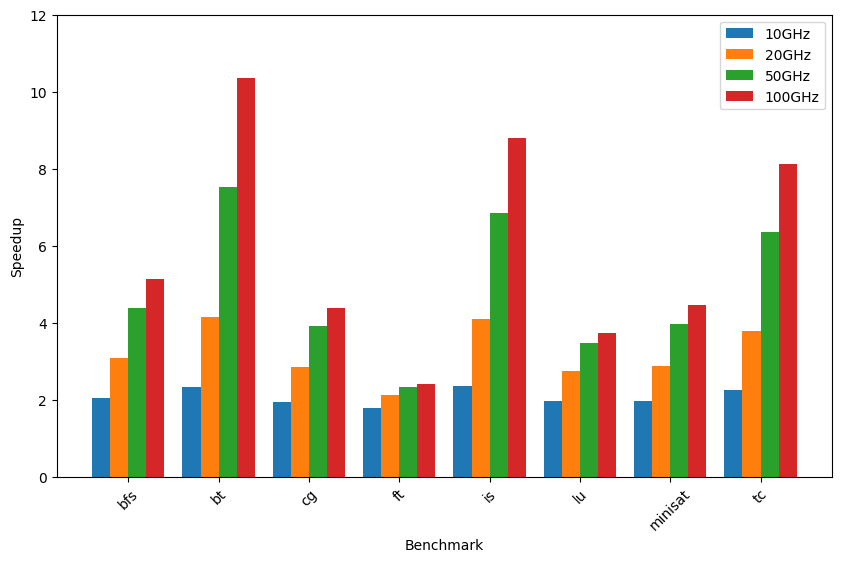

Average speedup for 10GHz: 2.07872819747764
Average speedup for 20GHz: 3.2141211684121744
Average speedup for 50GHz: 4.848534653661209
Average speedup for 100GHz: 5.922103231334976


In [149]:
speedup()

Maximum value of each bandwidth
4GHz: 319.5668410429625
10GHz: 745.9636846153846
20GHz: 1321.0805346956151
50GHz: 2407.4446175329713
100GHz: 3309.131192151845


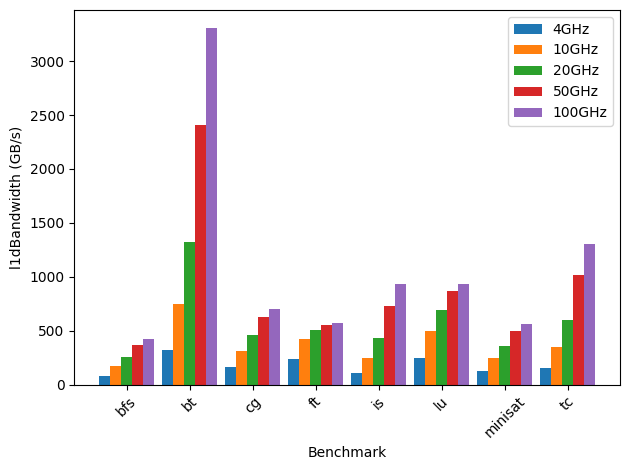

In [150]:
bandwidth('l1dBandwidth')

Maximum value of each bandwidth
4GHz: 133.71879122257053
10GHz: 309.1318051253168
20GHz: 537.7504500236855
50GHz: 929.8683027888446
100GHz: 1214.5260754332312


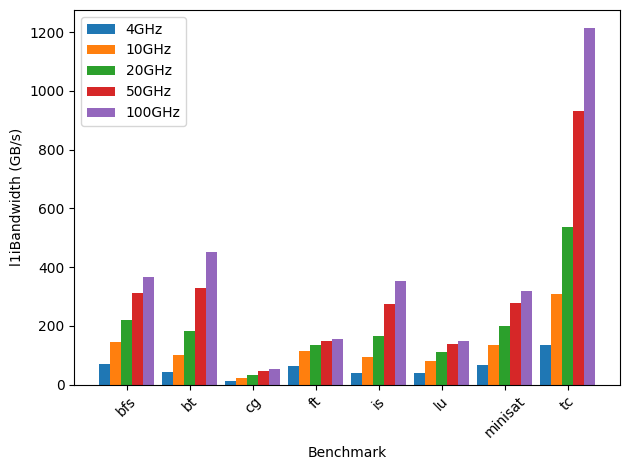

In [151]:
bandwidth('l1iBandwidth')

Maximum value of each bandwidth
4GHz: 239.51119498650982
10GHz: 439.0175911737664
20GHz: 520.738506410646
50GHz: 538.0408052621088
100GHz: 528.6482800274537


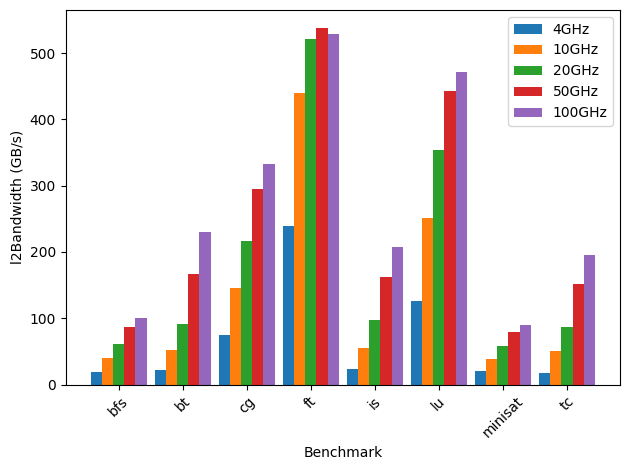

In [152]:
bandwidth('l2Bandwidth')

Maximum value of each bandwidth
4GHz: 71.07021229355605
10GHz: 137.75708378816446
20GHz: 202.74763246405072
50GHz: 278.0773507811457
100GHz: 312.24626639682185


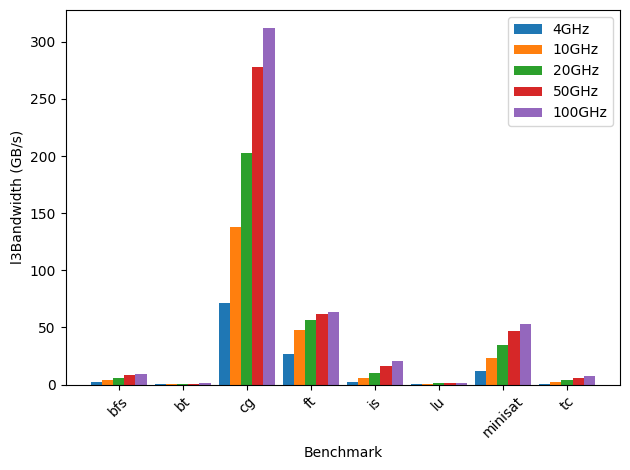

In [153]:
bandwidth('l3Bandwidth')

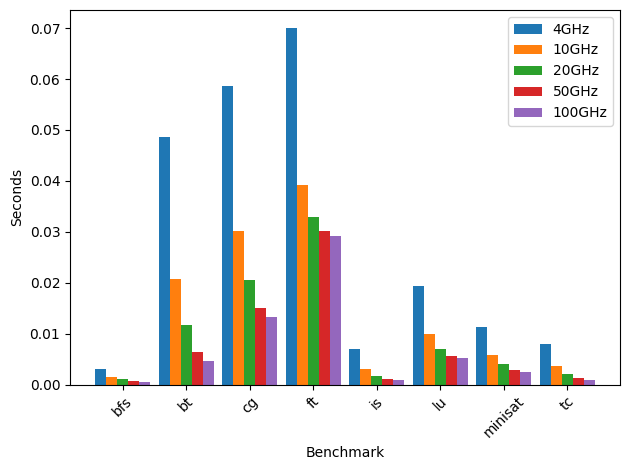

In [154]:
plot('Seconds')

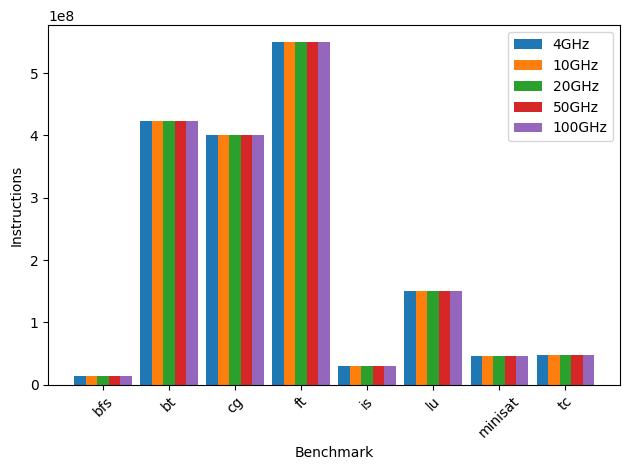

In [155]:
plot('Instructions')

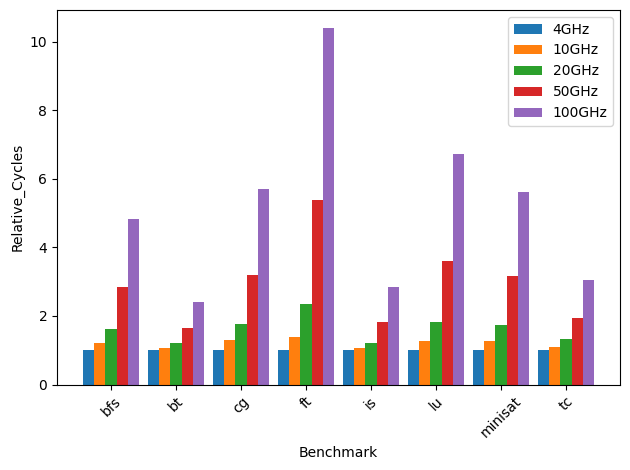

In [156]:
plot('Relative_Cycles')

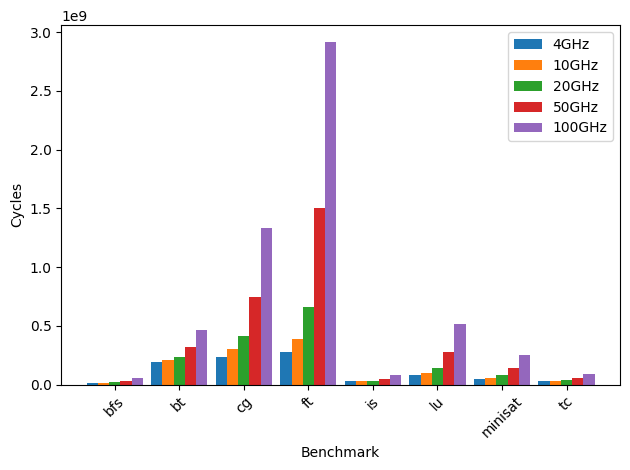

In [157]:
plot('Cycles')

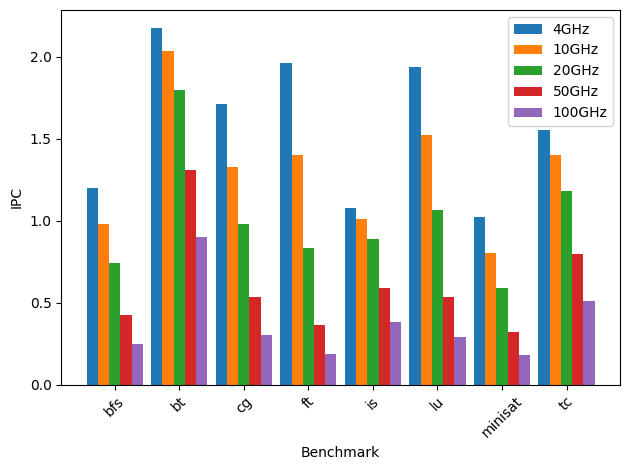

In [158]:
plot('IPC')

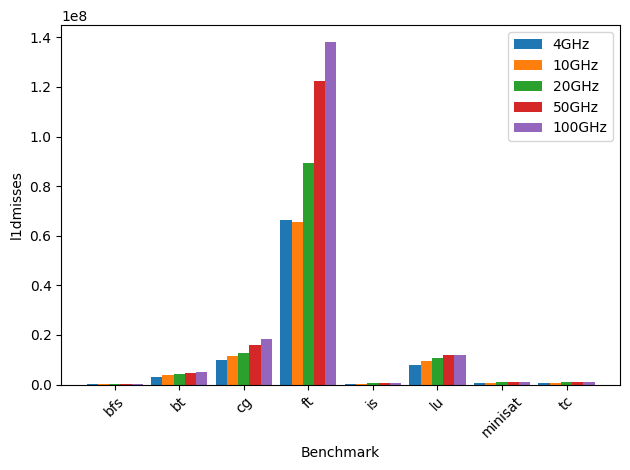

In [159]:
plot('l1dmisses')

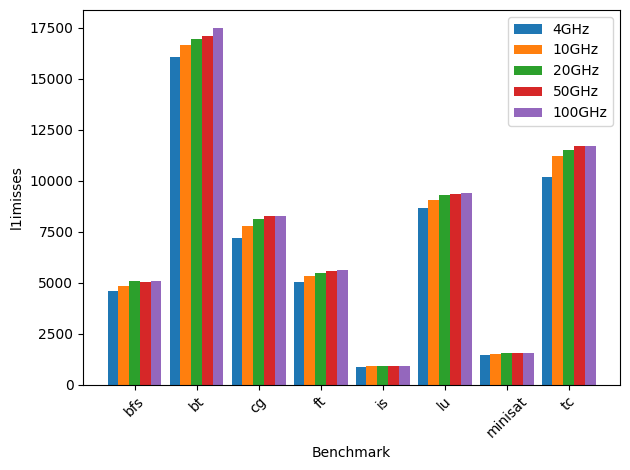

In [160]:
plot('l1imisses')

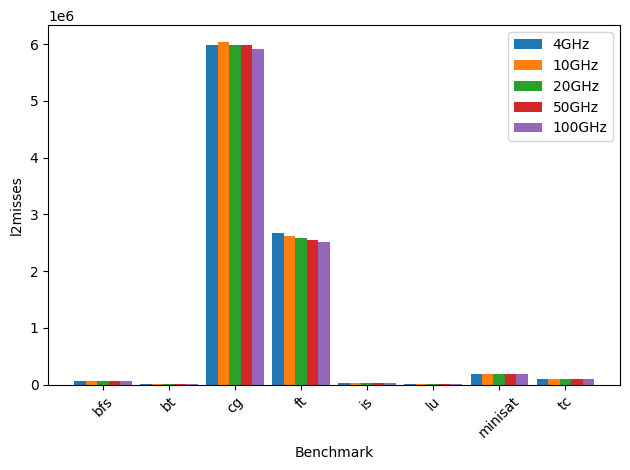

In [161]:
plot('l2misses')

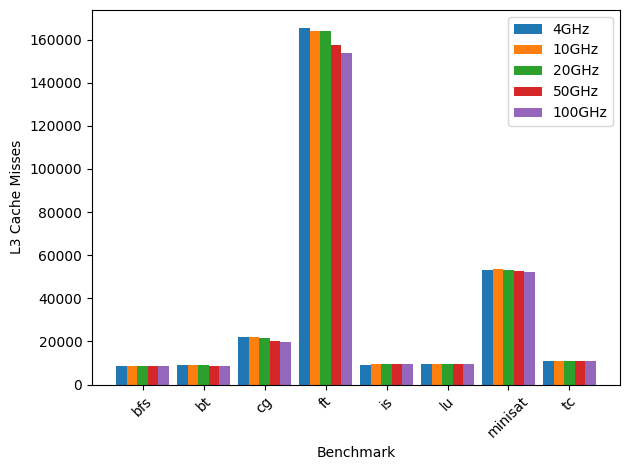

In [162]:
plot('l3misses', 'L3 Cache Misses')

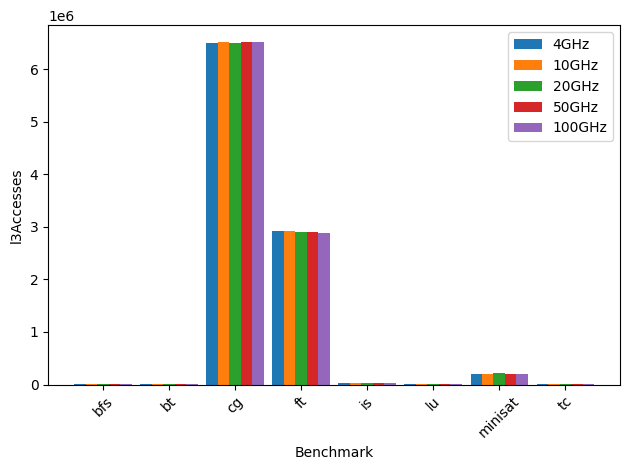

In [163]:
plot('l3Accesses')

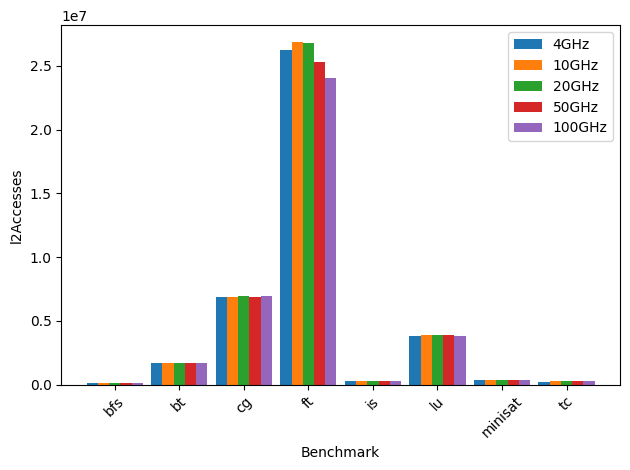

In [164]:
plot('l2Accesses')

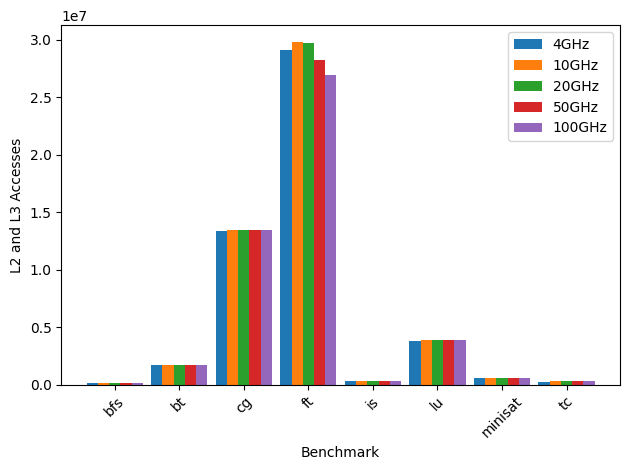

In [165]:
plot('l2l3Accesses', 'L2 and L3 Accesses')

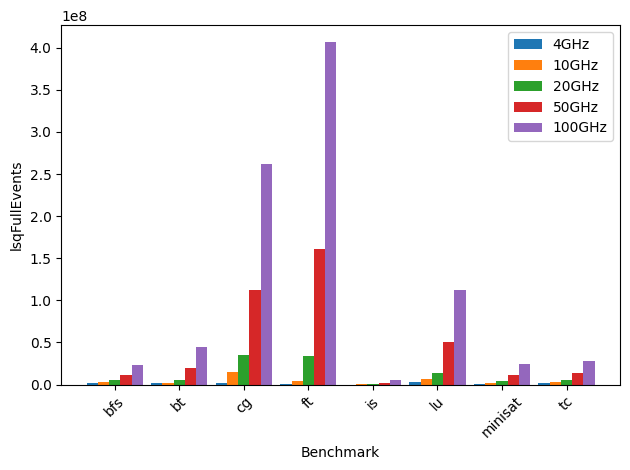

In [166]:
plot('lsqFullEvents')

Maximum value of each bandwidth
4GHz: 266.1510773579249
10GHz: 486.6728940647665
20GHz: 577.3377505013065
50GHz: 599.5505414922596
100GHz: 644.8641151337981


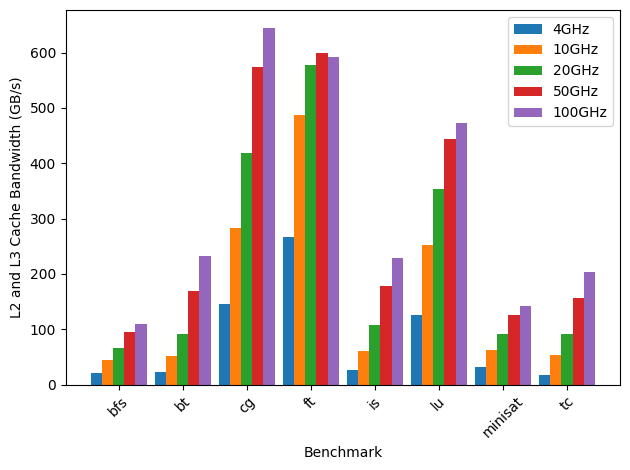

In [167]:
bandwidth('l2l3Bandwidth', 'L2 and L3 Cache Bandwidth')

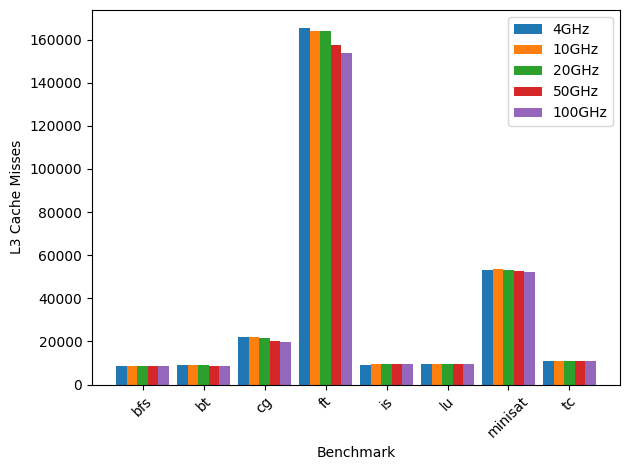

In [168]:
plot('l3misses', 'L3 Cache Misses')